In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)


<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Load university df

In [3]:
university_df = pd.read_pickle(DATA_DIR/ 'university_ranking_salary.pickle')
len(university_df)

6448

In [4]:
university_df[:4]

,World Rank,Institution,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
0,1.0,Harvard University,USA,1.0,1,1,1,1,100.0,166027.0,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25.0,1.0,Lawrence S. Bacow,President,6174951000,42103580.0,082359691|149617367|047006379,215500.0,1.0,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,5.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2505.0,-71.118313,42.374471,96.0,1.0,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,55783.941620,493,56164.312487,55205.642506,48297.784952,48627.110378,47797.093079
1,2.0,Massachusetts Institute of Technology,USA,2.0,4,12,2,8,96.7,166683.0,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25.0,1.0,L. Rafael Reif,President,6172531000,42103594.0,001425594,217800.0,1.0,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,15.0,14.0,6.0,17.0,15.0,15.0,15.0,1.0,4.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2507.0,-71.093226,42.359243,96.0,1.0,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,56659.816586,680,56952.349035,56164.312487,49056.118257,49309.393104,48627.110378
2,3.0,Stanford University,USA,3.0,10,4,3,2,95.1,243744.0,Stanford University,,,Stanford,CA,94305,6.0,8.0,Marc Tessier-Lavigne,President,6507232300,941156365.0,009214214,130500.0,1.0,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,2.0,21.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,41940,1,488,-2.0,6085,Santa Clara County,618.0,-122.167359,37.429434,96.0,1.0,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,62476.603840,349,63319.925605,62352.688787,49310.658122,49976.263303,49212.856186
3,6.0,Princeton University,USA,4.0,5,15,7,70,92.6,186131.0,Princeton University,,1 Nassau Hall,Princeton,NJ,08544-0070,34.0,2.0,Christopher L. Eisgruber,President,6092583000,210634501.0,002484665,262700.0,1.0,www.princeton.edu/,,,,www.princeton.edu/admission/financialaid/estim...,registrar.princeton.edu/student-services/veter...,fs.ncaa.org/Docs/newmedia/public/rates/index.html,www.princeton.edu/ods/,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,13.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,11.0,15.0,14.0,5.0,14.0,15.0,15.0,15.0,2.0,3.0,2.0,-2,-2.0,45940,1,408,-2.0,34021,Mercer County,3412.0,-74.659365,40.348732,96

### Threshold number of salaries

28260
27652
131


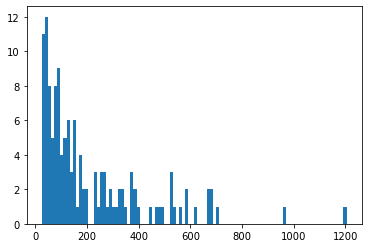

In [5]:
MIN_N_SALARIES = 25
print(university_df.N_SALARIES.sum())
university_df = university_df[university_df.N_SALARIES > MIN_N_SALARIES]
print(university_df.N_SALARIES.sum())
plt.hist(university_df.N_SALARIES, bins = 100);
print(len(university_df))

### Load metro salaries

In [6]:
metro_salary_df = pd.read_csv(DATA_DIR/ 'non-postdoc-salary'/ 'MSA_M2020_dl.csv')

In [7]:
metro_salary_df = metro_salary_df[metro_salary_df.AREA.isin(university_df.CBSA.values)]

In [8]:
len(metro_salary_df)

39981

In [9]:
metro_salary_df[:3]

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
457,10420,"Akron, OH",4,OH,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"311,480",1.4,1000.000,1.00,NaN,24.62,"51,220",1.3,9.85,13.09,19.44,30.53,43.80,"20,500","27,230","40,440","63,500","91,100",NaN,NaN
458,10420,"Akron, OH",4,OH,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"15,990",2.9,51.335,0.90,NaN,54.95,"114,300",1.2,22.87,33.99,48.24,68.42,95.81,"47,580","70,690","100,340","142,310","199,280",NaN,NaN
459,10420,"Akron, OH",4,OH,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,260,10.8,0.835,0.57,NaN,98.28,"204,420",5.5,40.48,58.46,95.94,#,#,"84,190","121,590","199,560",#,#,NaN,NaN


### merge salary df with RPPs

In [10]:
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)[:-5]
cost_of_living_df["RPP_all"] = cost_of_living_df["2019"]
cost_of_living_df = cost_of_living_df[cost_of_living_df.Description == "RPPs: All items"]

In [11]:
cost_of_living_df[:3]

,GeoFips,GeoName,LineCode,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,RPP_all
0,00000,United States,1.0,RPPs: All items,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,00999,United States (Nonmetropolitan Portion) 1/,1.0,RPPs: All items,86.6,86.8,87.3,87.5,87.8,88.2,88.1,88.0,87.9,87.9,87.3,86.8,86.8
8,10180,"Abilene, TX (Metropolitan Statistical Area)",1.0,RPPs: All items,90.4,89.8,90.4,90.8,91.4,90.9,91.2,90.9,90.8,89.8,90.7,90.3,90.3


In [12]:
cost_of_living_df['GeoFips'] = cost_of_living_df.GeoFips.values.astype(int)

In [13]:
metro_salary_df = metro_salary_df.merge(cost_of_living_df[['GeoFips', 'RPP_all']], left_on="AREA", right_on='GeoFips')

In [14]:
metro_salary_df[:3]

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,GeoFips,RPP_all
0,10420,"Akron, OH",4,OH,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"311,480",1.4,1000.000,1.00,NaN,24.62,"51,220",1.3,9.85,13.09,19.44,30.53,43.80,"20,500","27,230","40,440","63,500","91,100",NaN,NaN,10420,90.0
1,10420,"Akron, OH",4,OH,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"15,990",2.9,51.335,0.90,NaN,54.95,"114,300",1.2,22.87,33.99,48.24,68.42,95.81,"47,580","70,690","100,340","142,310","199,280",NaN,NaN,10420,90.0
2,10420,"Akron, OH",4,OH,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,260,10.8,0.835,0.57,NaN,98.28,"204,420",5.5,40.48,58.46,95.94,#,#,"84,190","121,590","199,560",#,#,NaN,NaN,10420,90.0


### get salary data as integers

In [15]:
def strip_name(name):
    return ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyz', name.lower()))

In [16]:
def get_int(x):
    try:
        return int(strip_name(x))
    except:
        return np.nan

In [17]:
metro_salary_df.A_MEAN.values

array(['51,220', '114,300', '204,420', ..., '32,560', '51,460', '51,020'],
      dtype=object)

In [18]:
metro_salary_df["mean_annual"] = [get_int(i) for i in metro_salary_df.A_MEAN.values]
metro_salary_df["median_annual"] = [get_int(i) for i in metro_salary_df.A_MEDIAN.values]
metro_salary_df["tot_emp"] = [get_int(i) for i in metro_salary_df.TOT_EMP.values]

### Get summary stats

In [19]:
median_pay_df = (
    metro_salary_df[["OCC_TITLE", "median_annual"]]
    .groupby("OCC_TITLE")
    .mean()
    .sort_values(by="median_annual", ascending=False)
)

In [20]:
median_pay_df[median_pay_df.median_annual < 60000][:20]

,median_annual
OCC_TITLE,
Public Relations Specialists,59973.846154
Subway and Streetcar Operators,59950.000000
Mechanical Drafters,59893.174603
Cardiovascular Technologists and Technicians,59790.526316
"Plumbers, Pipefitters, and Steamfitters",59765.600000
"Rotary Drill Operators, Oil and Gas",59758.750000
"Securities, Commodities, and Financial Services Sales Agents",59700.136986
Structural Iron and Steel Workers,59699.259259
Electricians,59573.417722


In [64]:
simiar_pay_jobs = median_pay_df[(median_pay_df.median_annual < 65000) & (median_pay_df.median_annual > 45000)].index.values

In [21]:
total_employees_df = (
    metro_salary_df[["OCC_TITLE", "tot_emp"]]
    .groupby("OCC_TITLE")
    .sum()
    .sort_values(by="tot_emp", ascending=False)
)

In [67]:
similar_jobs_df = total_employees_df[total_employees_df.index.isin(simiar_pay_jobs)]

In [68]:
similar_jobs_df.index.values

array(['Educational Instruction and Library Occupations',
       'Construction and Extraction Occupations',
       'Installation, Maintenance, and Repair Occupations',
       'Protective Service Occupations',
       'Arts, Design, Entertainment, Sports, and Media Occupations',
       'Community and Social Service Occupations',
       'Heavy and Tractor-Trailer Truck Drivers',
       'First-Line Supervisors of Office and Administrative Support Workers',
       'Sales Representatives, Wholesale and Manufacturing, Except Technical and Scientific Products',
       'Elementary School Teachers, Except Special Education',
       'Sales Representatives of Services, Except Advertising, Insurance, Financial Services, and Travel',
       'Secondary School Teachers, Except Special and Career/Technical Education',
       'Market Research Analysts and Marketing Specialists',
       'Computer User Support Specialists', 'Human Resources Specialists',
       'Carpenters', 'Electricians',
       'Execut

### Secondary school teachers 

In [ ]:
import seaborn as sns

In [75]:
occupation_list = [
    'Electricians',
    "Automotive Body and Related Repairers",
    "Postal Service Clerks",
    "Plumbers, Pipefitters, and Steamfitters",
    "Janitors and Cleaners, Except Maids and Housekeeping Cleaners",
    "Carpenters",
    "Lawyers",
    "Waiters and Waitresses",
    "Secondary School Teachers, Except Special and Career/Technical Education",
    "Elementary School Teachers, Except Special Education",
    "Accountants and Auditors",
    "Retail Salespersons",
    "Nursing Assistants"
]

Electricians


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


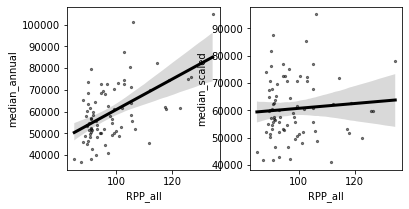

Automotive Body and Related Repairers


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


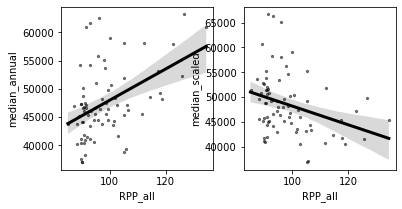

Postal Service Clerks


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


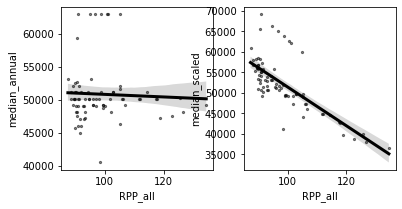

Plumbers, Pipefitters, and Steamfitters


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


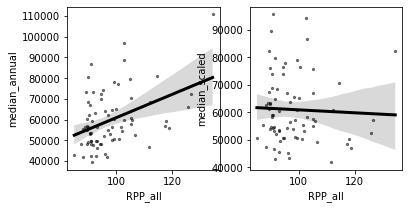

Janitors and Cleaners, Except Maids and Housekeeping Cleaners


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


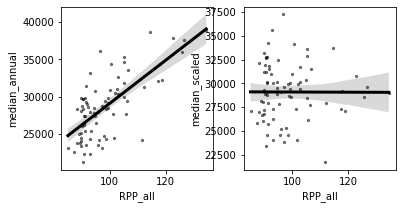

Carpenters


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


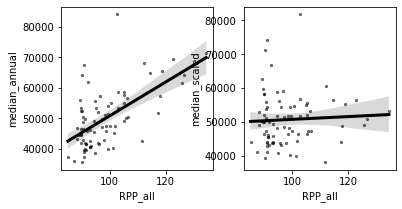

Lawyers


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


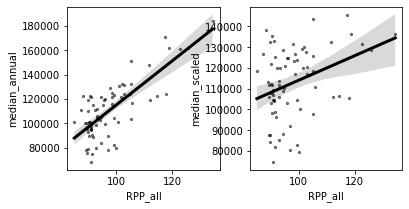

Waiters and Waitresses


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


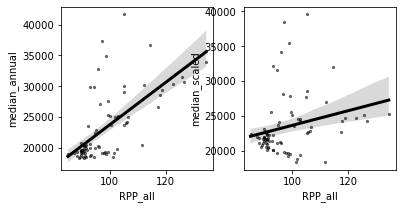

Secondary School Teachers, Except Special and Career/Technical Education


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


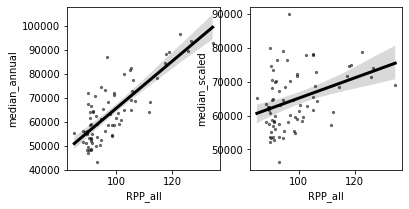

Elementary School Teachers, Except Special Education


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


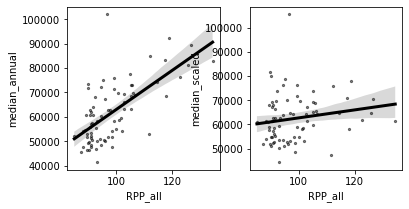

Accountants and Auditors


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


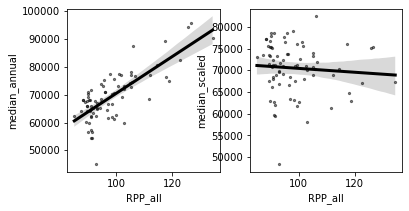

Retail Salespersons


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


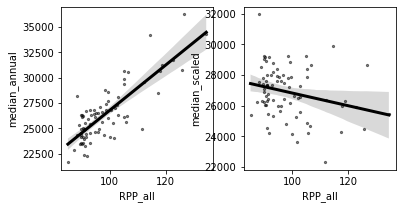

Nursing Assistants


<ipython-input-76-f52ab579a5d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)


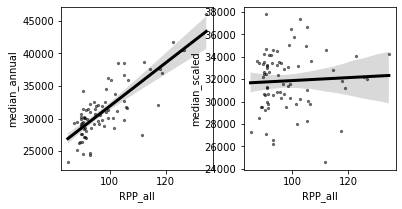

In [76]:
for occupation in occupation_list:
    print(occupation)
    occupation_df = metro_salary_df[metro_salary_df.OCC_TITLE == occupation]
    occupation_df["median_scaled"] = occupation_df.median_annual.values / (occupation_df.RPP_all.values / 100)
    
    fig, axs = plt.subplots(ncols=2, figsize=(6,3))
    ax = axs[0]
    sns.regplot(
        x="RPP_all",
        y="median_annual",
        data=occupation_df,
        ax=ax,
        color = 'k',
        scatter_kws={
            "alpha": 0.5,
            "s": 5,
        },
        line_kws = {
            'lw':3,

        }
    )
    ax = axs[1]
    sns.regplot(
        x="RPP_all",
        y="median_scaled",
        data=occupation_df,
        ax=ax,
        color = 'k',
        scatter_kws={
            "alpha": 0.5,
            "s": 5,
        },
        line_kws = {
            'lw':3,

        }
    )
    plt.show()